## 0. Installation

In [1]:
%%capture
# If the plugin package isn't installed, uncomment and run the line below. Otherwise, you can ignore this cell.
# ! pip install git+https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023

In [1]:
from kiara.api import KiaraAPI
kiara = KiaraAPI.instance()

## 1. Data onboarding

### 1.1. Download text file bundle into dataframe

In [2]:
inputs = {
    "url": "https://github.com/DHARPA-Project/kiara.examples/archive/refs/heads/main.zip",
    "sub_path": "kiara.examples-main/examples/workshops/dh_benelux_2023/data"
 }

dl_bundle = kiara.run_job('download.file_bundle', inputs=inputs)
dl_bundle

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field               value                                                                                                              │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   download_metadata                                                                                                                      │
│                         dict data     {                                                                                                  │
│                                         "response_headers": [                                                                            │
│                                           {                                                                                              │
│                                             "access-control-allow-origin": "https://render.githubusercontent.com",                       │
│                                             "content-disposition": "attachment; filename=kiara.examples-main.zip",                       │
│                                             "content-security-policy": "default-src 'none'; style-src 'unsafe-inline'; sandbox",         │
│                                             "content-type": "application/zip",                                                           │
│                                             "etag": "W/\"570f561b5eef9bfe47103ec7653956e268167dda4539e886f94a1c0cb5ec184e\"",            │
│                                             "strict-transport-security": "max-age=31536000",                                             │
│                                             "vary": "Authorization,Accept-Encoding,Origin",                                              │
│                                             "x-content-type-options": "nosniff",                                                         │
│                                             "x-frame-options": "deny",                                                                   │
│                                             "x-xss-protection": "1; mode=block",                                                         │
│                                             "date": "Wed, 24 May 2023 17:21:22 GMT",                                                     │
│                                             "transfer-encoding": "chunked",                                                              │
│                                             "x-github-request-id": "ECBE:DB0A:A75CD6:C662C5:646E4792"                                    │
│                                           },                                                                                             │
│                                           {                                                                                              │
│                                             "server": "GitHub.com",                                                                      │
│                                             "date": "Wed, 24 May 2023 17:21:21 GMT",                                                     │
│                                             "content-type": "text/html; charset=utf-8",                                                  │
│                                             "vary": "X-PJAX, X-PJAX-Container, Turbo-Visit, Turbo-Frame, Accept-Encoding, Accept, X…     │
│                                             "location": "https://codeload.github.com/DHARPA-Project/kiara.examples/zip/refs/heads/m…     │
│                                             "cache

In [3]:
kiara.list_operation_ids()

['create.database.from.file',
 'create.database.from.file_bundle',
 'create.database.from.table',
 'create.stopwords_list',
 'create.table.from.file',
 'create.table.from.file_bundle',
 'date.check_range',
 'date.extract_from_string',
 'dh_benelux_2023.example',
 'download.file',
 'download.file_bundle',
 'export.file.as.file',
 'export.table.as.csv_file',
 'extract.date_array.from.table',
 'file_bundle.pick.file',
 'file_bundle.pick.sub_folder',
 'generate.LDA.for.tokens_array',
 'get_bigrams',
 'get_lccn_metadata',
 'get_text_stats',
 'import.database.from.local_file_path',
 'import.file',
 'import.file_bundle',
 'import.local.file',
 'import.local.file_bundle',
 'import.table.from.local_file_path',
 'import.table.from.local_folder_path',
 'list.contains',
 'logic.and',
 'logic.nand',
 'logic.nor',
 'logic.not',
 'logic.or',
 'logic.xor',
 'onboard.zenodo_record',
 'parse.date_array',
 'preprocess.tokens_array',
 'query.database',
 'query.table',
 'string_filter.tokens',
 'table.pick

In [4]:
kiara.retrieve_operation_info('create.table.from.file_bundle')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         tabular                                                                                                   
                     Labels       package: kiara_plugin.tabular                                                                             
                     References   source_repo: ]8;id=145558;https://github.com/DHARPA-Project/kiara_plugin.tabular\https://github.com/DHARPA-Project/kiara_plugin.tabular]8;;\                                       
                                  documentation: ]8;id=334705;https://DHARPA-Project.github.io/kiara_plugin.tabular/\https://DHARPA-Project.github.io/kiara_plugin.tabular/]8;;\                                     
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a table value from a text file_bundle.                                                          
                                                                                                                                            
                                     The resulting table will have (at a minimum) the following collumns:                                   
                                     - id: an auto-assigned index                                                                           
                                     - rel_path: the relative path of the file (from the provided base path)                                
                                     - content: the text file content                                                                       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type          description                              Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       file_bundle   file_bundle   The source value (of type                yes        -- no default --     
                                                                   'file_bundle').                                                          
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name   type    description                                                                     
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       t

In [5]:
inputs = {
    'file_bundle' : dl_bundle['file_bundle']
}

corpus_table = kiara.run_job('create.table.from.file_bundle', inputs=inputs)
corpus_table

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field   value                                                                                                                          │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table                                                                                                                                  │
│             id     rel_path                        mime_type    size    content                        file_name                         │
│            ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│             0      Cronaca_Sovversiva/2012271201   text/plain   10428   LI 1,111 """"                  2012271201_1903-06-06_ed-1_se     │
│             1      Cronaca_Sovversiva/2012271201   text/plain   11730   Ebdomadario anarchico di pro   2012271201_1903-06-13_ed-1_se     │
│             2      Cronaca_Sovversiva/2012271201   text/plain   11482   ANNO I.                        2012271201_1903-06-20_ed-1_se     │
│             3      Cronaca_Sovversiva/2012271201   text/plain   10839   Ebdomadàrio anarchico di pro   2012271201_1903-06-27_ed-1_se     │
│             4      Cronaca_Sovversiva/2012271201   text/plain   11032   NUMERO 5                       2012271201_1903-07-04_ed-1_se     │
│             5      Cronaca_Sovversiva/2012271201   text/plain   10648   ANNO I.                        2012271201_1903-07-25_ed-1_se     │
│             6      Cronaca_Sovversiva/2012271201   text/plain   10682   ANNO I.                        2012271201_1903-08-01_ed-1_se     │
│             7      Cronaca_Sovversiva/2012271201   text/plain   11522   Ciac vtj'y inn                 2012271201_1903-08-08_ed-1_se     │
│             8      Cronaca_Sovversiva/2012271201   text/plain   11988   NUMERO 11                      2012271201_1903-08-15_ed-1_se     │
│             9      Cronaca_Sovversiva/2012271201   text/plain   11286   Ebdomadario anarchico di pro   2012271201_1903-08-22_ed-1_se     │
│             10     Cronaca_Sovversiva/2012271201   text/plain   10835   SUMERO 13                      2012271201_1903-08-29_ed-1_se     │
│             11     Cronaca_Sovversiva/2012271201   text/plain   10750   Ebdomadario anarchico di pro   2012271201_1903-09-05_ed-1_se     │
│             12     Cronaca_Sovversiva/2012271201   text/plain   11003   ANNO I.                        2012271201_1903-09-12_ed-1_se     │
│             13     Cronaca_Sovversiva/2012271201   text/plain   11198   ANNO I.                        2012271201_1903-09-19_ed-1_se     │
│             14     Cronaca_Sovversiva/2012271201   text/plain   10860   NUMERO 17                      2012271201_1903-09-26_ed-1_se     │
│             15     Cronaca_Sovversiva/2012271201   text/plain   10778   li                             2012271201_1903-10-03_ed-1_se     │
│             ...    ...                             ...          ...     ...                            ...                               │
│             ...    ...                             ...          ...     ...                            ...                               │
│             7244   L'Italia/sn85066408_1919-12-1   text/plain   18674   ANNO XXXIII-                   sn85066408_1919-12-15_ed-1_se     │
│             7245   L'Italia/sn85066408_1919-12-1   text/plain   19692   anno xxxiii.                   sn85066408_1919-12-16_ed-1_se     │
│             7246   L'Italia/sn85066408_1919-12-1   text/plain   24491   ANNO XXXIII                    sn85066408_1919-12-17_ed-1_se     │
│             7247   L'Italia/sn85066408_1919-12-1  

### 1.2. Add metadata

In [6]:
kiara.retrieve_operation_info('get_lccn_metadata')

Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=39787;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=270053;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module will get metadata from strings that comply with LCCN pattern: '/sn86069873/1900-01-05/'    
                                     to get the publication references and the dates and add those informations as two new columns.         
                                                                                                                                            
                                     In addition, if a mapping scheme is provided between publication references and publication names,     
                                     it will add a column with the publication names.                                                       
                                     Such a map is provided in the form of a list of lists with publication references and publication      
                                     names in the same order.                                                                               
                                     Here is an example of how it should look:                                                              
                                     [["2012271201","sn85054967","sn93053873"],["Cronaca_Sovversiva","Il_Patriota","L'Indipendente"]]       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type     description                                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_input   table    The corpus for which we want to get           yes        -- no default --     
                                                              metadata from file names.                                                     
                                       column_name   string   The column containing metadata. In order to   yes        -- no default --     
                         

In [7]:
inputs = {
    'table_input' : corpus_table['table'],
    'column_name' : 'rel_path',
    'map': [['2012271201','sn85054967','sn93053873','sn85066408','sn85055164','sn84037024','sn84037025','sn84020351','sn86092310','sn92051386'],['Cronaca_Sovversiva','Il_Patriota','L\'Indipendente','L\'Italia','La_Libera_Parola','La_Ragione','La_Rassegna','La_Sentinella','La_Sentinella_del_West','La_Tribuna_del_Connecticut']]
}

corpus_metadata = kiara.run_job('get_lccn_metadata', inputs=inputs)
corpus_metadata

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table_output                                                                                                                           │
│                    id     rel_path       mime_type    size    content         file_name      date         pub_ref      pub_name          │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    0      Cronaca_Sovv   text/plain   10428   LI 1,111 """"   2012271201_1   1903-06-06   2012271201   Cronaca_Sovve     │
│                    1      Cronaca_Sovv   text/plain   11730   Ebdomadario a   2012271201_1   1903-06-13   2012271201   Cronaca_Sovve     │
│                    2      Cronaca_Sovv   text/plain   11482   ANNO I.         2012271201_1   1903-06-20   2012271201   Cronaca_Sovve     │
│                    3      Cronaca_Sovv   text/plain   10839   Ebdomadàrio a   2012271201_1   1903-06-27   2012271201   Cronaca_Sovve     │
│                    4      Cronaca_Sovv   text/plain   11032   NUMERO 5        2012271201_1   1903-07-04   2012271201   Cronaca_Sovve     │
│                    5      Cronaca_Sovv   text/plain   10648   ANNO I.         2012271201_1   1903-07-25   2012271201   Cronaca_Sovve     │
│                    6      Cronaca_Sovv   text/plain   10682   ANNO I.         2012271201_1   1903-08-01   2012271201   Cronaca_Sovve     │
│                    7      Cronaca_Sovv   text/plain   11522   Ciac vtj'y in   2012271201_1   1903-08-08   2012271201   Cronaca_Sovve     │
│                    8      Cronaca_Sovv   text/plain   11988   NUMERO 11       2012271201_1   1903-08-15   2012271201   Cronaca_Sovve     │
│                    9      Cronaca_Sovv   text/plain   11286   Ebdomadario a   2012271201_1   1903-08-22   2012271201   Cronaca_Sovve     │
│                    10     Cronaca_Sovv   text/plain   10835   SUMERO 13       2012271201_1   1903-08-29   2012271201   Cronaca_Sovve     │
│                    11     Cronaca_Sovv   text/plain   10750   Ebdomadario a   2012271201_1   1903-09-05   2012271201   Cronaca_Sovve     │
│                    12     Cronaca_Sovv   text/plain   11003   ANNO I.         2012271201_1   1903-09-12   2012271201   Cronaca_Sovve     │
│                    13     Cronaca_Sovv   text/plain   11198   ANNO I.         2012271201_1   1903-09-19   2012271201   Cronaca_Sovve     │
│                    14     Cronaca_Sovv   text/plain   10860   NUMERO 17       2012271201_1   1903-09-26   2012271201   Cronaca_Sovve     │
│                    15     Cronaca_Sovv   text/plain   10778   li              2012271201_1   1903-10-03   2012271201   Cronaca_Sovve     │
│                    ...    ...            ...          ...     ...             ...            ...          ...          ...               │
│                    ...    ...            ...          ...     ...             ...            ...          ...          ...               │
│                    7244   L'Italia/sn8   text/plain   18674   ANNO XXXIII-    sn85066408_1   1919-12-15   sn85066408   L'Italia          │
│                    7245   L'Italia/sn8   text/plain   19692   anno xxxiii.    sn85066408_1   1919-12-16   sn85066408   L'Italia          │
│                    7246   L'Italia/sn8   text/plain   24491   ANNO XXXIII     sn85066408_1   1919-12-17   sn85066408   L'Italia          │
│                    7247   L'Italia/sn8   text/plai

In [8]:
kiara.retrieve_operation_info('get_text_stats')

Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=523215;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=728019;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module will add columns with words and characters count to a table containing text content.       
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type     description                                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_input   table    The corpus for which we want to add words     yes        -- no default --     
                                                              and characters count.                                                         
                                       column_name   string   The column containing the text for which we   yes        -- no default --     
                                                              want the count.                                                               
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table_output   table   Augmented table containing words and characters count.                        
                                                                                                                                            
                  

In [9]:
inputs = {
    'table_input' : corpus_metadata['table_output'],
    'column_name' : 'content'
}

text_stats = kiara.run_job('get_text_stats', inputs=inputs)
text_stats

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   table_output                                                                                                                           │
│                    id     rel_path   mime_typ   size    content    file_nam   date       pub_ref    pub_name    chars_co   words_cou     │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    0      Cronaca_   text/pla   10428   LI 1,111   20122712   1903-06-   20122712   Cronaca_S   10345      1706          │
│                    1      Cronaca_   text/pla   11730   Ebdomada   20122712   1903-06-   20122712   Cronaca_S   11648      2167          │
│                    2      Cronaca_   text/pla   11482   ANNO I.    20122712   1903-06-   20122712   Cronaca_S   11397      1890          │
│                    3      Cronaca_   text/pla   10839   Ebdomadà   20122712   1903-06-   20122712   Cronaca_S   10748      1700          │
│                    4      Cronaca_   text/pla   11032   NUMERO 5   20122712   1903-07-   20122712   Cronaca_S   10954      1747          │
│                    5      Cronaca_   text/pla   10648   ANNO I.    20122712   1903-07-   20122712   Cronaca_S   10552      1783          │
│                    6      Cronaca_   text/pla   10682   ANNO I.    20122712   1903-08-   20122712   Cronaca_S   10620      1729          │
│                    7      Cronaca_   text/pla   11522   Ciac vtj   20122712   1903-08-   20122712   Cronaca_S   11430      2002          │
│                    8      Cronaca_   text/pla   11988   NUMERO 1   20122712   1903-08-   20122712   Cronaca_S   11799      1949          │
│                    9      Cronaca_   text/pla   11286   Ebdomada   20122712   1903-08-   20122712   Cronaca_S   11186      1866          │
│                    10     Cronaca_   text/pla   10835   SUMERO 1   20122712   1903-08-   20122712   Cronaca_S   10771      1752          │
│                    11     Cronaca_   text/pla   10750   Ebdomada   20122712   1903-09-   20122712   Cronaca_S   10683      1749          │
│                    12     Cronaca_   text/pla   11003   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   10922      1776          │
│                    13     Cronaca_   text/pla   11198   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   11118      1744          │
│                    14     Cronaca_   text/pla   10860   NUMERO 1   20122712   1903-09-   20122712   Cronaca_S   10769      1761          │
│                    15     Cronaca_   text/pla   10778   li         20122712   1903-10-   20122712   Cronaca_S   10705      1753          │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    7244   L'Italia   text/pla   18674   ANNO XXX   sn850664   1919-12-   sn850664   L'Italia    18326      2928          │
│                    7245   L'Italia   text/pla   19692   anno xxx   sn850664   1919-12-   sn850664   L'Italia    19377      3178          │
│                    7246   L'Italia   text/pla   24491   ANNO XXX   sn850664   1919-12-   sn850664   L'Italia    24176      4082          │
│                    7247   L'Italia   text/pla   20

In [10]:
# Exporting data table to pandas dataframe for visualization purposes
# This operation will not impact data operations as it is for display purposes only
table_obj = text_stats['table_output'].data
arrow_table = table_obj.arrow_table
sources = arrow_table.to_pandas()

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(font_scale=.7)

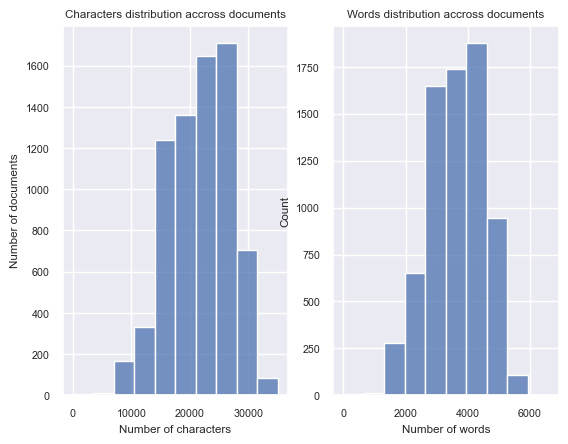

In [12]:
f, axes = plt.subplots(1, 2)
sns.histplot(sources.chars_count, bins=10, ax=axes[0]).set(title='Characters distribution accross documents', xlabel='Number of characters', ylabel='Number of documents')
sns.histplot(sources.words_count, bins=10, ax=axes[1]).set(title='Words distribution accross documents', xlabel='Number of words')
plt.show()

### 1.3. Creating a subset of the dataframe

- Visualize documents distribution over time

In [13]:
kiara.retrieve_operation_info('viz_data_query')

Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=542479;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=731898;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module processes a dataset to display a visualization of the corpus aggregated by a period of     
                                     time.                                                                                                  
                                                                                                                                            
                                     It aims at serving as a visual aid to create a subset of a table.                                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name     type     description                                  Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       distribution   string   The wished data periodicity to display on    yes        -- no default --     
                                                               visualization, values can be either                                          
                                                               'day','month' or 'year'.                                                     
                                       column         string   The column that contains publication names   yes        -- no default --     
                                                               or ref/id.                                                                   
                                       table          table    The table for which the distribution is      yes        -- no default --     
                                                               needed.                                                                      
                                                                                                                                            
                        

In [14]:
inputs = {
    'distribution' : 'month',
    'column' : 'pub_name',
    'table': text_stats['table_output']
}

viz_data = kiara.run_job('viz_data_query', inputs=inputs)

In [15]:
from observable_jupyter import embed

In [29]:
embed('@dharpa-project/timestamped-corpus', cells=['viewof chart', 'style'], inputs={"data":viz_data['viz_data'].data.list_data,"scaleType":'height', "timeSelected":'month'})


- Create subset

In [30]:
kiara.retrieve_operation_info('query.table')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         tabular                                                                                                   
                     Labels       package: kiara_plugin.tabular                                                                             
                     References   source_repo: ]8;id=883528;https://github.com/DHARPA-Project/kiara_plugin.tabular\https://github.com/DHARPA-Project/kiara_plugin.tabular]8;;\                                       
                                  documentation: ]8;id=244352;https://DHARPA-Project.github.io/kiara_plugin.tabular/\https://DHARPA-Project.github.io/kiara_plugin.tabular/]8;;\                                     
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Execute a sql query against an (Arrow) table.                                                          
                                                                                                                                            
                                     The default relation name for the sql query is 'data', but can be modified by the 'relation_name'      
                                     config option/input.                                                                                   
                                                                                                                                            
                                     If the 'query' module config option is not set, users can provide their own query, otherwise the       
                                     pre-set                                                                                                
                                     one will be used.                                                                                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name      type     description                                 Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table           table    The table to query                          yes        -- no default --     
                                       query           string   The query, use the value of the             yes        -- no default --     
                                                                'relation_name' input as table, e.g.                                        
                                                                'select * from data'.                                                       
                                       relation_name   string   The name the table is referred to in the    no         data                 
                                        

In [31]:
date_ref_1 = "1903-6-6"
date_ref_2 = "1919-5-1"
query = f"SELECT * FROM sources WHERE date <= DATE '{date_ref_2}' AND date > DATE '{date_ref_1}'"

In [32]:
inputs = {
    'query' : query,
    'table': text_stats['table_output']
}

subset = kiara.run_job('query.table', inputs=inputs)
subset

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   query_result                                                                                                                           │
│                    id     rel_path   mime_typ   size    content    file_nam   date       pub_ref    pub_name    chars_co   words_cou     │
│                   ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                    1      Cronaca_   text/pla   11730   Ebdomada   20122712   1903-06-   20122712   Cronaca_S   11648      2167          │
│                    2      Cronaca_   text/pla   11482   ANNO I.    20122712   1903-06-   20122712   Cronaca_S   11397      1890          │
│                    3      Cronaca_   text/pla   10839   Ebdomadà   20122712   1903-06-   20122712   Cronaca_S   10748      1700          │
│                    4      Cronaca_   text/pla   11032   NUMERO 5   20122712   1903-07-   20122712   Cronaca_S   10954      1747          │
│                    5      Cronaca_   text/pla   10648   ANNO I.    20122712   1903-07-   20122712   Cronaca_S   10552      1783          │
│                    6      Cronaca_   text/pla   10682   ANNO I.    20122712   1903-08-   20122712   Cronaca_S   10620      1729          │
│                    7      Cronaca_   text/pla   11522   Ciac vtj   20122712   1903-08-   20122712   Cronaca_S   11430      2002          │
│                    8      Cronaca_   text/pla   11988   NUMERO 1   20122712   1903-08-   20122712   Cronaca_S   11799      1949          │
│                    9      Cronaca_   text/pla   11286   Ebdomada   20122712   1903-08-   20122712   Cronaca_S   11186      1866          │
│                    10     Cronaca_   text/pla   10835   SUMERO 1   20122712   1903-08-   20122712   Cronaca_S   10771      1752          │
│                    11     Cronaca_   text/pla   10750   Ebdomada   20122712   1903-09-   20122712   Cronaca_S   10683      1749          │
│                    12     Cronaca_   text/pla   11003   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   10922      1776          │
│                    13     Cronaca_   text/pla   11198   ANNO I.    20122712   1903-09-   20122712   Cronaca_S   11118      1744          │
│                    14     Cronaca_   text/pla   10860   NUMERO 1   20122712   1903-09-   20122712   Cronaca_S   10769      1761          │
│                    15     Cronaca_   text/pla   10778   li         20122712   1903-10-   20122712   Cronaca_S   10705      1753          │
│                    16     Cronaca_   text/pla   11300   ANNO I.    20122712   1903-10-   20122712   Cronaca_S   11187      1860          │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    ...    ...        ...        ...     ...        ...        ...        ...        ...         ...        ...           │
│                    7001   L'Italia   text/pla   20781   “Publish   sn850664   1919-04-   sn850664   L'Italia    20449      3283          │
│                    7002   L'Italia   text/pla   24839   ' lll)k>   sn850664   1919-04-   sn850664   L'Italia    24441      3945          │
│                    7003   L'Italia   text/pla   22104   “Publish   sn850664   1919-04-   sn850664   L'Italia    21795      3495          │
│                    7004   L'Italia   text/pla   22

## 2. Corpus pre-processing

In [33]:
infos = kiara.retrieve_operations_info()
operations = {}
for op_id, info in infos.item_infos.items():
    if info.context.labels.get("package", None) == "kiara_plugin.language_processing":
        operations[op_id] = info

print(operations.keys())

dict_keys(['create.stopwords_list', 'generate.LDA.for.tokens_array', 'preprocess.tokens_array', 'tokenize.string', 'tokenize.texts_array'])


In [34]:
kiara.retrieve_operation_info('tokenize.texts_array')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, tokenize, tokens                                                                     
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=26059;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=449016;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Split sentences into words or words into characters.                                                   
                                                                                                                                            
                                     In other words, this operation establishes the word boundaries (i.e., tokens) a very helpful way of    
                                     finding patterns. It is also the typical step prior to stemming and lemmatization                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name         type      description                             Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       texts_array        array     An array of text items to be            yes        -- no default --     
                                                                    tokenized.                                                              
                                       tokenize_by_word   boolean   Whether to tokenize by word             no         True                 
                                                                    (default), or character.                                                
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                 

In [35]:
kiara.retrieve_operation_info('table.pick.column')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         tabular                                                                                                   
                     Labels       package: kiara_plugin.tabular                                                                             
                     References   source_repo: ]8;id=389480;https://github.com/DHARPA-Project/kiara_plugin.tabular\https://github.com/DHARPA-Project/kiara_plugin.tabular]8;;\                                       
                                  documentation: ]8;id=853730;https://DHARPA-Project.github.io/kiara_plugin.tabular/\https://DHARPA-Project.github.io/kiara_plugin.tabular/]8;;\                                     
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Pick one column from a table, returning an array.                                                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name    type     description                                   Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       table         table    A table.                                      yes        -- no default --     
                                       column_name   string   The name of the column to extract.            yes        -- no default --     
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name   type    description                                                                     
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       array        array   The column.                                                                     
                                                                                                                                            
                  

In [36]:
inputs = {
    'table': subset['query_result'],
    'column_name': 'content'
}

text_contents = kiara.run_job('table.pick.column', inputs=inputs)
text_contents

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field   value                                                                                                                          │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────                                      │
│   array                                                                                                                                  │
│             Ebdomadario anarchico di propaganda rivoluzionaria.                                                                          │
│             ANNO I.                                                                                                                      │
│             Ebdomadàrio anarchico di propaganda rivoluzionaria.                                                                          │
│             NUMERO 5                                                                                                                     │
│             ANNO I.                                                                                                                      │
│             ANNO I.                                                                                                                      │
│             Ciac vtj'y inn                                                                                                               │
│             NUMERO 11                                                                                                                    │
│             Ebdomadario anarchico di propaganda: rivoluzionaria.                                                                         │
│             SUMERO 13                                                                                                                    │
│             Ebdomadario anarchico di propaganda rh                                                                                       │
│             ANNO I.                                                                                                                      │
│             ANNO I.                                                                                                                      │
│             NUMERO 17                                                                                                                    │
│             li                                                                                                                           │
│             ANNO I.                                                                                                                      │
│             ...                                                                                                                          │
│             ...                                                                                                                          │
│             “Published M d «sMbuted_u.de, p— » No. 8* .«horlred b, Ihe AC « Oelober flic ed  ...                                         │
│             ' lll)k>h - d an<! d - ÌS - trÌbUted Undef PCrmU 88 authorlM,d by the Art of Oct ...                                         │
│             “Published distributed u„d.r per™,. 88 «M** „ «MM On,„* «. - % .*,* ». VUMIdMb,  ...                                         │
│             ‘ P,,bll ' hed N«- ** by .b, »*«.***„., im , « „„ allhePosl o,n« « S.„ Fraadaoo, ...                                         │
│             ‘ Published and distributed under penult No as . ,                                                                           │
│             “Published and distributed under permi

In [37]:
inputs = {
    'texts_array': text_contents['array']
}

tokens = kiara.run_job('tokenize.texts_array', inputs=inputs)
tokens

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria', '.', 'XJt', ' ...                                  │
│                    ['ANNO', 'I.', 'NUMERO', '31', 'VVER', 'Ebdomadario', 'anarchico', 'di', 'propag ...                                  │
│                    ['Ebdomadàrio', 'anarchico', 'di', 'propaganda', 'rivoluzionaria', '.', 'Ut', 'r ...                                  │
│                    ['NUMERO', '5', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria' ...                                  │
│                    ['ANNO', 'I.', 'KtJ', 'SIERO', '8', 'Ebdomadario', 'anarchico', 'di', 'propagand ...                                  │
│                    ['ANNO', 'I.', 'NUMEHO', '9', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'r ...                                  │
│                    ['Ciac', 'vtj', "'", 'y', 'inn', 'NUMERO', '10', 'Ebdomadario', 'anarchico', 'di ...                                  │
│                    ['NUMERO', '11', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria ...                                  │
│                    ['Ebdomadario', 'anarchico', 'di', 'propaganda', ':', 'rivoluzionaria', '.', 'Ut ...                                  │
│                    ['SUMERO', '13', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria ...                                  │
│                    ['Ebdomadario', 'anarchico', 'di', 'propaganda', 'rh', '.', "'-'-", "'", '--', " ...                                  │
│                    ['ANNO', 'I.', 'NUMERO', '15', '-', 'Ebdomadario', 'anarchico', 'di', 'propagand ...                                  │
│                    ['ANNO', 'I.', 'NtLNJEKO', '16', 'SOVVERSIVA', 'Ebdomadario', 'anarchico', 'di', ...                                  │
│                    ['NUMERO', '17', 'Ebdomadario', 'anarchico', 'di', 'propaganda', 'rivoluzionaria ...                                  │
│                    ['li', 'ANNO', 'I.', 'NUMERO', '1S', '....', '.', 'Ebdomadario', 'anarchico', 'd ...                                  │
│                    ['ANNO', 'I.', 'NUMERO', '19', 'CRONACA', 'SOWÉRSIY', 'Ebdomadario', 'anarchico' ...                                  │
│                    ...                                                                                                                   │
│                    ...                                                                                                                   │
│                    ['“', 'Published', 'M', 'd', '«', 'sMbuted_u.de', ',', 'p—', '»', 'No', '.', '8' ...                                  │
│                    ["'", 'lll', ')', 'k', '>', 'h', '-', 'd', 'an', '<', '!', 'd', '-', 'ÌS', '-',  ...                                  │
│                    ['“', 'Published', 'distributed', 'u', '„', 'd.r', 'per™', ',', '.', '88', '«',  ...                                  │
│                    ['‘', 'P', ',', ',bll', "'", 'hed', 'N', '«', '-', '*', '*', 'by', '.b', ',', '» ...                                  │
│                    ['‘', 'Published', 'and', 'distributed', 'under', 'penult', 'No', 'as', '.', ',' ...                                  │
│                    ['“', 'Published', 'and', 'dist

In [38]:
kiara.retrieve_operation_info('preprocess.tokens_array')

Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, tokens, preprocess                                                                   
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=595286;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=863140;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Preprocess lists of tokens, incl. lowercasing, remove special characers, etc.                          
                                                                                                                                            
                                     Lowercasing: Lowercase the words. This operation is a double-edged sword. It can be effective at       
                                     yielding potentially better results in the case of relatively small datasets or datatsets with a       
                                     high percentage of OCR mistakes. For instance, if lowercasing is not performed, the algorithm will     
                                     treat USA, Usa, usa, UsA, uSA, etc. as distinct tokens, even though they may all refer to the same     
                                     entity. On the other hand, if the dataset does not contain such OCR mistakes, then it may become       
                                     difficult to distinguish between homonyms and make interpreting the topics much harder.                
                                                                                                                                            
                                     Removing stopwords and words with less than three characters: Remove low information words. These      
                                     are typically words such as articles, pronouns, prepositions, conjunctions, etc. which are not         
                                     semantically salient. There are numerous stopword lists available for many, though not all,            
                                     languages which can be easily adapted to the individual researcher's needs. Removing words with less   
                                     than three characters may additionally remove many OCR mistakes. Both these operations have the dual   
                                     advantage of yielding more reliable results while reducing the size of the dataset, thus in turn       
                                     reducing the required processing power. This step can therefore hardly be considered optional in TM.   
                                                                                                                                            
                

In [39]:
kiara.retrieve_operation_info('create.stopwords_list')


Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing                                                                                       
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=267854;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=939051;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Create a list of stopwords from one or multiple sources.                                               
                                                                                                                                            
                                     This will download nltk stopwords if necessary, and merge all input lists into a single, sorted list   
                                     without duplicates.                                                                                    
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name   type   description                                      Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       languages    list   A list of languages, will be used to retrieve    no         -- no default --     
                                                           language-specific stopword from nltk.                                            
                                       stopwords    list   A list of additional, custom stopwords.          no         -- no default --     
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name       type   description                                                                  
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       stopwords_list   list   A sorted list of unique stopwords.                                           
                

In [40]:
import pandas as pd
custom_stopword_list = list(pd.read_csv('stop_words.csv')['stopword'])

In [41]:
inputs = {
    "languages": ["italian", "english"],
    "stopwords": custom_stopword_list
}

stopwords_outputs = kiara.run_job('create.stopwords_list', inputs=inputs)
my_stopwords_list = stopwords_outputs['stopwords_list']
my_stopwords_list.data

ListModel(list_data=['Indiana', 'Not', 'Which', 'Who', 'a', 'ab', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'about', 'above', 'ac', 'accidenti', 'ad', 'adesso', 'af', 'affinche', 'after', 'again', 'against', 'agl', 'agli', 'ahime', 'ahimã¨', 'ahimè', 'ai', 'ain', 'al', 'alcuna', 'alcuni', 'alcuno', 'ali', 'alio', 'all', 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'am', 'ami', 'an', 'anche', 'ancho', 'anco', 'ancora', 'and', 'ani', 'anni', 'anno', 'ano', 'ansa', 'anticipo', 'any', 'aono', 'ap', 'ar', 'are', 'aren', "aren't", 'as', 'assai', 'at', 'attesa', 'attraverso', 'au', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avu

In [42]:
inputs = {
    'tokens_array': tokens['tokens_array'],
    'remove_stopwords' : my_stopwords_list,
    'to_lowercase': True,
    'remove_non_alpha': True,
    'remove_short_tokens': 2
}

preprocessed_tokens = kiara.run_job('preprocess.tokens_array', inputs=inputs)
preprocessed_tokens

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'xjt', 'redezt', 'm ...                                  │
│                    ['numero', 'vver', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', ' ...                                  │
│                    ['ebdomadàrio', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeat', 'miseris' ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeat', ...                                  │
│                    ['ktj', 'siero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 're ...                                  │
│                    ['numeho', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeai', ...                                  │
│                    ['ciac', 'vtj', 'inn', 'numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivo ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redest', ...                                  │
│                    ['ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'rtdest', 'miscris' ...                                  │
│                    ['sumero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redesi', ...                                  │
│                    ['ebdomadario', 'anarchico', 'propaganda', 'czpcrbis', 'annuo', 'interno', 'este ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeat', ...                                  │
│                    ['ntlnjeko', 'sovversiva', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzion ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redeai', ...                                  │
│                    ['numero', 'ebdomadario', 'anarchico', 'propaganda', 'rivoluzionaria', 'redesi', ...                                  │
│                    ['numero', 'cronaca', 'sowérsiy', 'ebdomadario', 'anarchico', 'propaganda', 'riv ...                                  │
│                    ...                                                                                                                   │
│                    ...                                                                                                                   │
│                    ['published', 'horlred', 'ihe', 'oelober', 'flic', 'post', 'onice', 'son', 'fris ...                                  │
│                    ['lll', 'trìbuted', 'undef', 'pcrmu', 'authorlm', 'art', 'october', 'file', 'pos ...                                  │
│                    ['published', 'distributed', 'vumidmb', 'xxxiii', 'patria', 'umanità', 'ptu', 'v ...                                  │
│                    ['hed', 'allheposl', 'fraadaoo', 'burleson', 'mmler', 'patria', 'umanità', 'vecc ...                                  │
│                    ['published', 'distributed', 'penult', 'ortober', 'fhe', 'post', 'office', 'cal' ...                                  │
│                    ['published', 'distributed', 'p

In [43]:
kiara.retrieve_operation_info('get_bigrams')


Author(s)                                                                                                                                  
                     Lorella Viola       lorella.viola@uni.lu                                                                               
                     Mariella De Crouy   mariella.decrouychanel@uni.lu                                                                      
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         dh_benelux_2023                                                                                           
                     Labels       package: kiara_plugin.dh_benelux_2023                                                                     
                     References   source_repo: ]8;id=706203;https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023\https://github.com/DHARPA-Project/kiara_plugin.dh_benelux_2023]8;;\                               
                                  documentation: ]8;id=183345;https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/\https://DHARPA-Project.github.io/kiara_plugin.dh_benelux_2023/]8;;\                             
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   This module computes bigrams and/or trigrams.                                                          
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name          type      description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       tokens              array     The array containing the tokens.       yes        -- no default --     
                                       bigrams_threshold   integer   Score threshold for forming the        yes        -- no default --     
                                                                     phrases (a higher score means fewer                                    
                                                                     phrases)                                                               
                                       bigrams_min_count   integer   Ignore phrases with total collected    yes        -- no default --     
                                                                     count lower than this value.                                           
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                                       field name     type    description                                                                   
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                        

In [44]:
inputs = {
    'tokens' : preprocessed_tokens['tokens_array'],
    'bigrams_threshold' : 20,
    'bigrams_min_count' : 3,
}

bigrams = kiara.run_job('get_bigrams', inputs=inputs)
bigrams

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field          value                                                                                                                   │
│  ─────────────────────────────────────────────────────────────────────────────────────────────────────────                               │
│   tokens_array                                                                                                                           │
│                    ['ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'xjt', 'redezt', 'miserìs ...                                  │
│                    ['numero', 'vver', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redeat ...                                  │
│                    ['ebdomadàrio_anarchico', 'propaganda_rivoluzionaria', 'redeat_miseris', 'aheat_ ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redeat', 'miseiis ...                                  │
│                    ['ktj', 'siero', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redest', ...                                  │
│                    ['numeho', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redeai_miserìs ...                                  │
│                    ['ciac', 'vtj', 'inn', 'numero_ebdomadario', 'anarchico_propaganda', 'rivoluzion ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redest', 'miserò_ ...                                  │
│                    ['ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'rtdest', 'miscris', 'abe ...                                  │
│                    ['sumero', 'ebdomadario_anarchico', 'propaganda_rivoluzionaria', 'redesi', 'mtse ...                                  │
│                    ['ebdomadario_anarchico', 'propaganda', 'czpcrbis', 'annuo_interno', 'estero_sem ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redeat', 'miseiis ...                                  │
│                    ['ntlnjeko', 'sovversiva_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria', ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redeai', 'miseris ...                                  │
│                    ['numero_ebdomadario', 'anarchico_propaganda', 'rivoluzionaria_redesi', 'mtseris ...                                  │
│                    ['numero', 'cronaca', 'sowérsiy', 'ebdomadario_anarchico', 'propaganda_rivoluzio ...                                  │
│                    ...                                                                                                                   │
│                    ...                                                                                                                   │
│                    ['published', 'horlred', 'ihe', 'oelober', 'flic', 'post', 'onice', 'son', 'fris ...                                  │
│                    ['lll', 'trìbuted', 'undef', 'pcrmu', 'authorlm', 'art_october', 'file_post', 'o ...                                  │
│                    ['published_distributed', 'vumidmb', 'xxxiii_patria', 'umanità', 'ptu_vecchio',  ...                                  │
│                    ['hed', 'allheposl', 'fraadaoo', 'burleson', 'mmler', 'patria_umanità', 'vecchio ...                                  │
│                    ['published_distributed', 'penult', 'ortober', 'fhe', 'post_office', 'cal_order' ...                                  │
│                    ['published_distributed', 'perm

In [45]:
kiara.retrieve_operation_info('generate.LDA.for.tokens_array')


Author(s)                                                                                                                                  
                     Markus Binsteiner   markus@frkl.io                                                                                     
                                                                                                                                            
 Context                                                                                                                                    
                     Tags         language_processing, LDA, tokens                                                                          
                     Labels       package: kiara_plugin.language_processing                                                                 
                     References   source_repo: ]8;id=248579;https://github.com/DHARPA-Project/kiara_plugin.language_processing\https://github.com/DHARPA-Project/kiara_plugin.language_processing]8;;\                           
                                  documentation: ]8;id=756287;https://DHARPA-Project.github.io/kiara_plugin.language_processing/\https://DHARPA-Project.github.io/kiara_plugin.language_processing/]8;;\                         
                                                                                                                                            
 Operation details                                                                                                                          
                     Documentation   Perform Latent Dirichlet Allocation on a tokenized corpus.                                             
                                                                                                                                            
                                     This module computes models for a range of number of topics provided by the user.                      
                                                                                                                                            
                     Inputs                                                                                                                 
                                       field name          type      description                            Required   Default              
                                      ──────────────────────────────────────────────────────────────────────────────────────────────────    
                                       tokens_array        array     The text corpus.                       yes        -- no default --     
                                       num_topics_min      integer   The minimal number of topics.          no         7                    
                                       num_topics_max      integer   The max number of topics.              no         7                    
                                       compute_coherence   boolean   Whether to compute the coherence       no         False                
                                                                     score for each model.                                                  
                                       words_per_topic     integer   How many words per topic to put in     no         10                   
                                                                     the result model.                                                      
                                                                                                                                            
                                                                                                                                            
                     Outputs                                                                                                                
                

In [46]:
inputs = {
    'tokens_array' : bigrams['tokens_array'],
    'num_topics_min' : 4,
    'num_topics_max' : 9,
    'compute_coherence': True,
}

lda = kiara.run_job('generate.LDA.for.tokens_array', inputs=inputs)
lda

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field             value                                                                                                                │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   coherence_map                                                                                                                          │
│                       dict data     {                                                                                                    │
│                                       "4": 0.3463828846671143,                                                                           │
│                                       "5": 0.32376645886709615,                                                                          │
│                                       "6": 0.3323961085302641,                                                                           │
│                                       "7": 0.30946838809891153,                                                                          │
│                                       "8": 0.31994637183824737,                                                                          │
│                                       "9": 0.30767885342145745                                                                           │
│                                     }                                                                                                    │
│                       dict schema   {                                                                                                    │
│                                       "title": "dict",                                                                                   │
│                                       "type": "object"                                                                                   │
│                                     }                                                                                                    │
│                                                                                                                                          │
│   coherence_table                                                                                                                        │
│                       topic_id   words                                                                                  num_topics       │
│                      ──────────────────────────────────────────────────────────────────────────────────────────────────────────────      │
│                       1          guerra, italia, roma, tedeschi, italiani, italiano, uniti, germania, york, nemic ...   4                │
│                       2          guerra, italia, roma, germania, uniti, italiano, italiani, fronte, presidente, y ...   4                │
│                       3          italia, roma, guerra, italiano, italiani, presidente, york, uniti, pace, truppe        4                │
│                       4          italia, roma, uniti, guerra, italiano, presidente, italiani, york, essa, fronte        4                │
│                       1          italia, roma, york, italiani, uniti, italiano, essa, guerra, popolo, giornale          5                │
│                       2          guerra, italia, roma, italiani, uniti, tedeschi, italiano, fronte, italiana, ger ...   5                │
│                       3          roma, italia, presidente, york, italiano, guerra, uniti, italiana, italiani, num ...   5                │
│                       4          italia, guerra, r

In [52]:
coherence_map = lda['coherence_map'].data.dict_data

<Axes: >

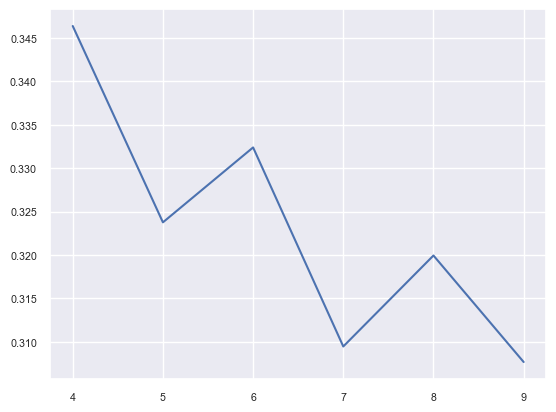

In [53]:
sns.lineplot(coherence_map)

In [37]:
topics = lda['topic_models']

topics.lineage

generate.LDA.for.tokens_array
├── input: compute_coherence (boolean) = 0e4da50f-750f-4df1-a4d4-0db939f120f7
├── input: num_topics_max (integer) = e0ea4fa1-b99d-4b67-b62b-60543cb5bb5f
├── input: num_topics_min (integer) = ab44fe60-6066-48c8-9b46-94880730f1cf
├── input: tokens_array (array) = 64c04938-9343-44fe-876a-2e7f245ffdce
│   └── get_bigrams
│       ├── input: bigrams_min_count (integer) = 14faf069-920a-436d-9cde-ccaefd87e333
│       ├── input: bigrams_threshold (integer) = 89fa9426-4df9-4f11-9c8a-2ce06fba6249
│       └── input: tokens (array) = b547e541-ae13-4f72-ae8f-2af93051ad30
│           └── preprocess.tokens_array
│               ├── input: remove_all_numeric (boolean) = 73fd3af3-41ec-44b8-bacd-d0fd62cedfd9
│               ├── input: remove_alphanumeric (boolean) = 6d758512-b969-4ae4-9b21-794c89246d0d
│               ├── input: remove_non_alpha (boolean) = bd637633-922d-487c-b881-0528551c9427
│               ├── input: remove_short_tokens (integer) = 4f8b0edc-698a-48e8-b544-a9c833047e7e
│               ├── input: remove_stopwords (list) = e859dc3e-f98e-45ce-acc1-f3dec775c0e0
│               │   └── create.stopwords_list
│               │       ├── input: languages (list) = eecde396-ad3c-4093-9a1a-f7823211980d
│               │       └── input: stopwords (list) = 81f893c4-e191-4fda-ac94-c2092671d4dc
│               ├── input: to_lowercase (boolean) = 931edde3-3e14-4e6e-a837-1ad22e78cc22
│               └── input: tokens_array (array) = 2afcd53e-bf28-447e-b76f-da33ea6d2802
│                   └── tokenize.texts_array
│                       ├── input: texts_array (array) = 2a641836-da5d-4f75-bff0-33da666bdff1
│                       │   └── table.pick.column
│                       │       ├── input: column_name (string) = b1ed5765-516e-49b7-bec2-978de36ac9d0
│                       │       └── input: table (table) = 35a6d92f-3645-4190-b10a-70035edb2611
│                       │           └── query.table
│                       │               ├── input: query (string) = 168be232-4f37-4ef1-ba1b-5024600fab29
│                       │               ├── input: relation_name (string) = 96c3047e-ff68-493c-bfd3-5b6cf6ad8f98
│                       │               └── input: table (table) = 77c60048-eb7c-43c0-9194-18d83c76146a
│                       │                   └── get_text_stats
│                       │                       ├── input: column_name (string) = 6fdc605e-67a6-4dc3-a93d-c5572887c42e
│                       │                       └── input: table_input (table) = b5d8c15d-c61f-423d-8776-150f75130188
│                       │                           └── get_lccn_metadata
│                       │                               ├── input: column_name (string) = b4377660-2f70-45ff-b491-fca9d9160046
│                       │                               ├── input: map (list) = 3c4b4dbd-316d-4cda-a610-b7cd2bfe8124
│                       │                               └── input: table_input (table) = ebb9fbee-f850-457b-a2dd-cf74955325cd
│                       │                                   └── create.table
│                       │                                       └── input: file_bundle (file_bundle) = 60f1236f-4b85-4222-84c4-f7dbe56855a4
│                       │                                           └── download.file_bundle
│                       │                                               ├── input: sub_path (string) = 743eb894-79ef-41ff-aaf3-69217de60ec4
│                       │                                               └── input: url (string) = 59f2bdee-ad12-4aa7-9def-bf8ba068c1d1
│                       └── input: tokenize_by_word (boolean) = 152d5241-a377-4cb8-be22-a8cd7f8d724d
└── input: words_per_topic (integer) = a3f4a373-31b8-465d-a2d3-42757550f4d8

In [40]:
from kiara_plugin.dh_benelux_2023.utils import augment_lineage_data

In [41]:
augmented_nodes = augment_lineage_data(topics,kiara)

In [42]:
from observable_jupyter import embed

In [43]:
embed('@dharpa-project/kiara-data-lineage', cells=['displayViz', 'style'], inputs={'dataset':augmented_nodes, 'modulesNodes':12, 'valueNodes':7, 'Width': 300, 'Height': 500})